Start of shape modeling

See also http://astro.troja.mff.cuni.cz/projects/asteroids3D/web.php and https://arxiv.org/abs/1601.06967 or http://adsabs.harvard.edu/abs/2008Icar..198...91T, http://adsabs.harvard.edu/full/1982M%26P....27...47B,  for example
https://space.frieger.com/asteroids/asteroids/

http://slideplayer.com/slide/9941030/

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

In [2]:
def rotation_matrix(theta, phi):
    theta = np.radians(theta)
    phi = np.radians(phi)
    rot = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]], float)
    rz = np.array([[np.cos(theta), -np.sin(theta), 0], 
                   [np.sin(theta), np.cos(theta), 0], 
                   [0, 0, 1]], float)
    rx = np.array([[1, 0, 0],
                   [0, np.cos(phi), -np.sin(phi)],
                   [0, np.sin(phi), np.cos(phi)]], float)
    rot = np.dot(rot, rz)
    rot = np.dot(rot, rx)
    return rot

def ellipsoid(a, b, c, rotation, npoints=100):
    # cartesian coordinates: x^2/a^2 + y^2/b^2 + z^2/c^2 = 1
    # parametric equations: x = a*cos(u)*cos(v), y = b*cos(u)*sin(v), z = c*sin(v) [pi/2<=u<=pi/2, -pi<=v<=pi]
    u = np.linspace(0, 2*np.pi, npoints)
    v = np.linspace(0, np.pi, npoints)
    x = a * np.outer(np.cos(u), np.sin(v))
    y = b * np.outer(np.sin(u), np.sin(v))
    z = c * np.outer(np.ones(len(u)), np.cos(v))
    # rotate accordingly
    for i in range(len(x)):
        for j in range(len(x)):
            [x[i,j],y[i,j],z[i,j]] = np.dot([x[i,j],y[i,j],z[i,j]], rotation)
    return x, y, z

In [3]:
def axes_equal_3D(ax, max_val=None):
    if max_val is not None:
        for dim in ('xyz'):
            getattr(ax, 'set_{}lim'.format(dim))(-max_val, max_val)
    else:
        extents = np.array([getattr(ax, 'get_{}lim'.format(dim))() for dim in 'xyz'])
        sz = extents[:,1] - extents[:,0]
        centers = np.mean(extents, axis=1)
        maxsize = max(abs(sz))
        r = maxsize/2
        for ctr, dim in zip(centers, 'xyz'):
            getattr(ax, 'set_{}lim'.format(dim))(ctr - r, ctr + r)
        
def add_axes(ax, a, b, c, rotation):
    # make some purdy axes
    axes = np.array([[a, 0, 0],
                     [0, b, 0],
                     [0, 0, c]], float)
    # rotate accordingly
    for i in range(len(axes)):
        axes[i] = np.dot(axes[i], rotation)


    # plot axes
    for p in axes:
        X3 = np.linspace(-p[0], p[0], 100)
        Y3 = np.linspace(-p[1], p[1], 100)
        Z3 = np.linspace(-p[2], p[2], 100)
        ax.plot(X3, Y3, Z3, color='k')

a 392.79 b 65.47 c 43.64 a/b 6.00 a/c 9.00 area 10000.00 10000.00


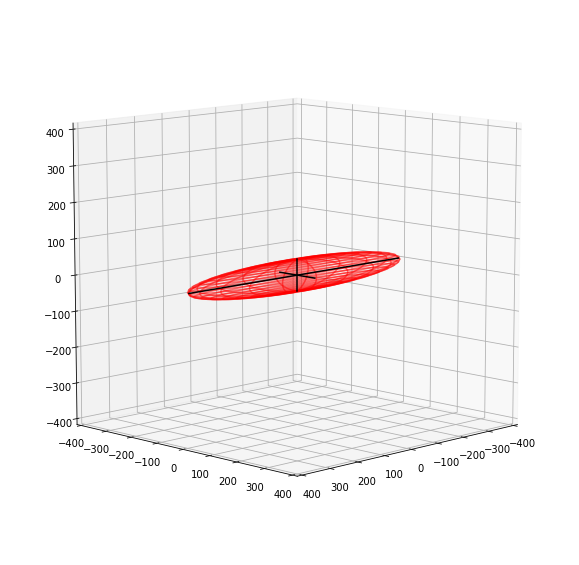

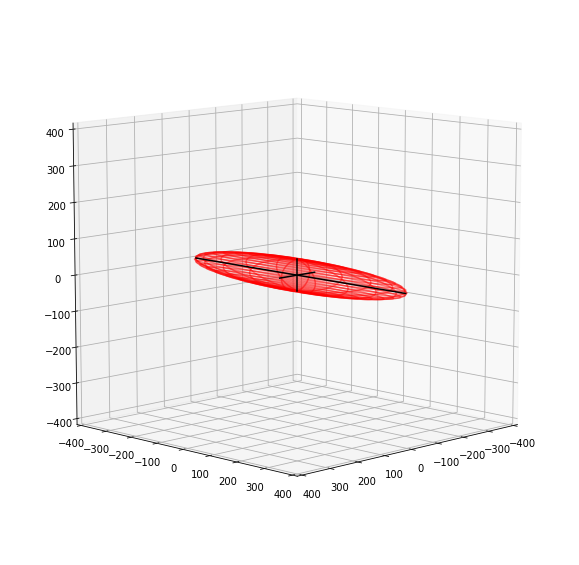

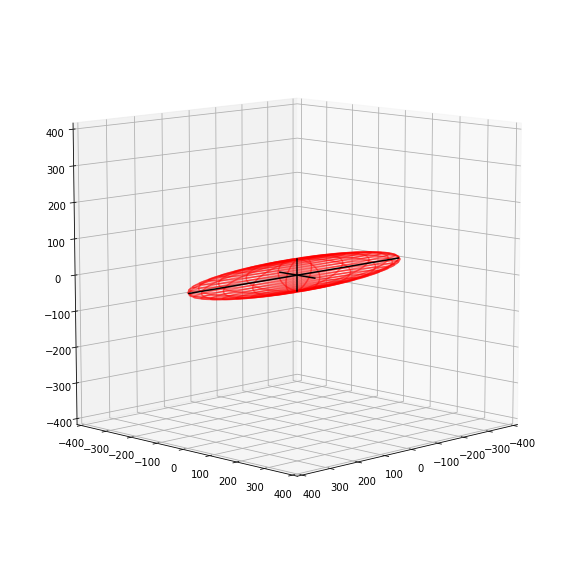

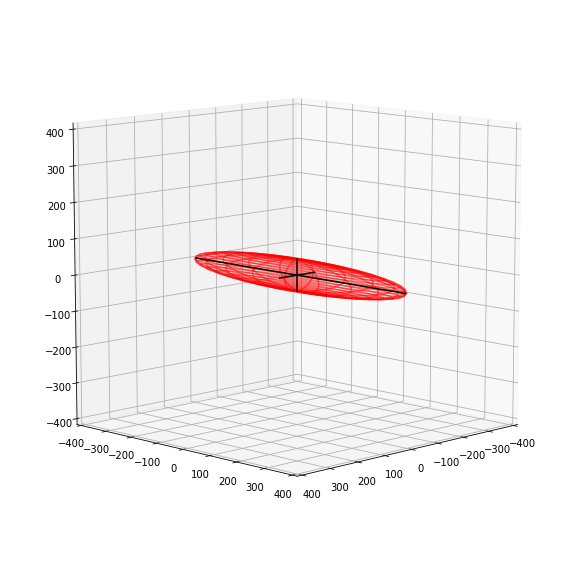

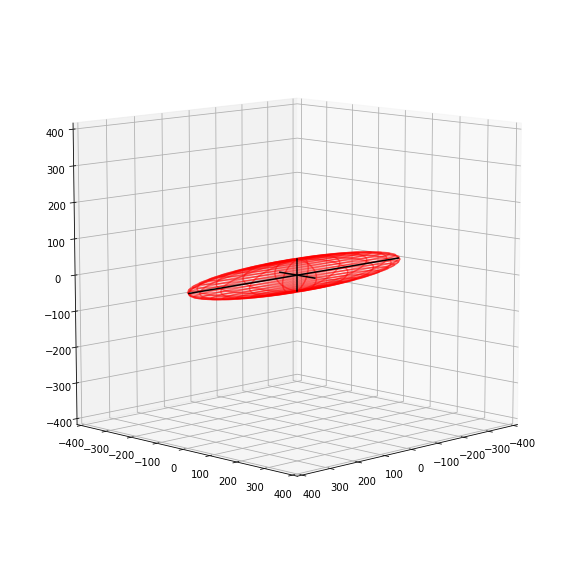

In [6]:
sampling=20
mean_radius = 100.0
c = 1
b = 1.5
a = 6 * b
scale_factor = np.sqrt(mean_radius**2 / ((a*c + b*c) / 2))
a *= scale_factor
b *= scale_factor
c *= scale_factor
print('a %.2f b %.2f c %.2f a/b %.2f a/c %.2f area %.2f %.2f' % (a, b, c, a/b, a/c, (a*c + b*c)/2, mean_radius**2))
counter = 1
for theta in (np.arange(0, 362, 90)):
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')
    rotation = rotation_matrix(theta, 0)
    x, y, z = ellipsoid(a, b, c, rotation)
    ax.plot_wireframe(x, y, z,  rcount=sampling, ccount=sampling, color='r', alpha=0.5)
    #ax.plot_surface(x, y, z,  rcount=sampling, ccount=sampling, color='r', alpha=0.2)
    add_axes(ax, a, b, c, rotation)
    axes_equal_3D(ax, max_val=400)
    ax.view_init(10, 45)
    ax.axis('on')
    #plt.savefig('oumuamua_%d.png' % (counter), format='png')
    counter += 1
    #plt.close()

a 219.30 b 95.35 c 63.56 a/b 2.30 a/c 3.45 area 10000.00 10000.00


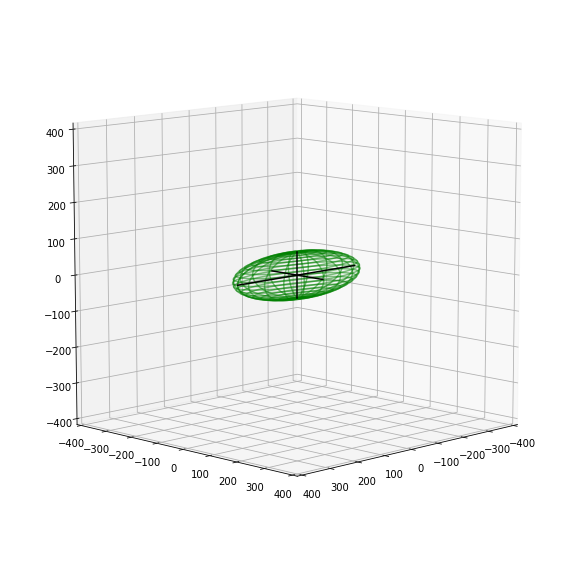

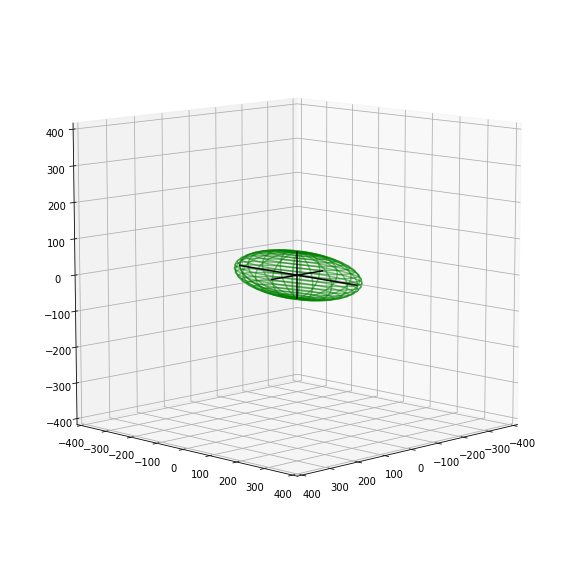

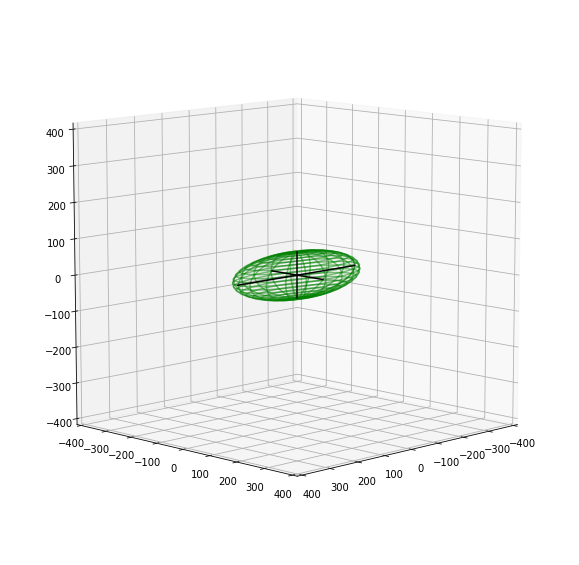

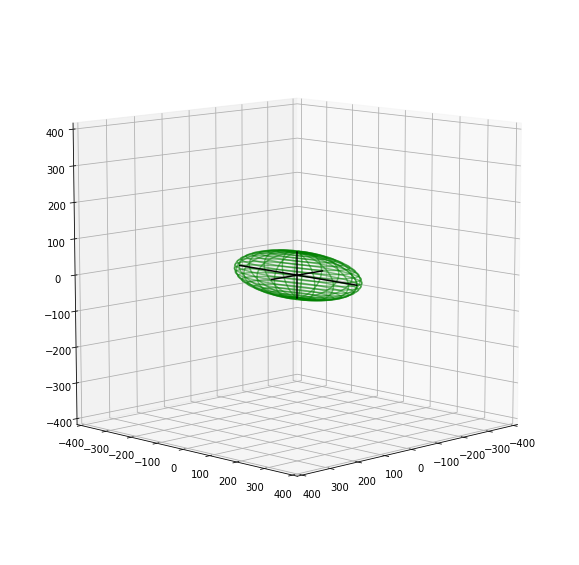

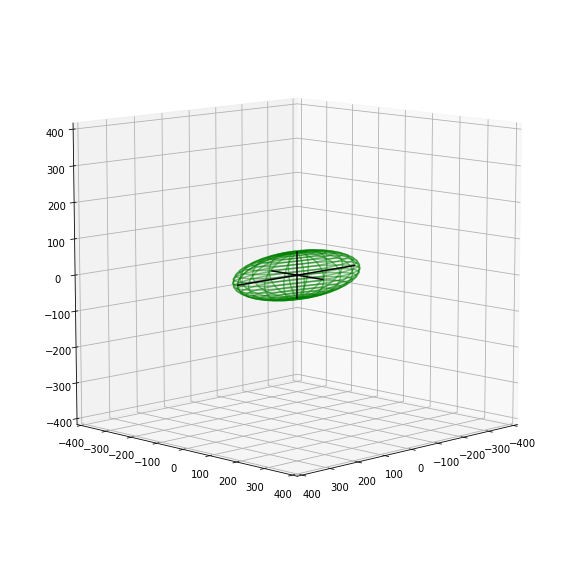

In [7]:
sampling = 20
mean_radius = 100.0 
c = 1
b = 1.5
a = 2.3 * b
scale_factor = np.sqrt(mean_radius**2 / ((a*c + b*c) / 2))
a *= scale_factor
b *= scale_factor
c *= scale_factor
print('a %.2f b %.2f c %.2f a/b %.2f a/c %.2f area %.2f %.2f' % (a, b, c, a/b, a/c, (a*c + b*c)/2, mean_radius**2))
counter = 1
for theta in (np.arange(0, 362, 90)):
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')
    rotation = rotation_matrix(theta, 0)
    x, y, z = ellipsoid(a, b, c, rotation)
    ax.plot_wireframe(x, y, z,  rcount=sampling, ccount=sampling, color='g', alpha=0.5)
    #ax.plot_surface(x, y, z,  rcount=sampling, ccount=sampling, color='r', alpha=0.2)
    add_axes(ax, a, b, c, rotation)
    axes_equal_3D(ax, max_val=400)
    ax.view_init(10, 45)
    ax.axis('on')
    #plt.savefig('other_%d.png' % (counter), format='png')
    counter += 1
    #plt.close()

In [8]:
sampling=20
mean_radius = 100.0
c = 1
b = 1.5
a = 7 * b
scale_factor = np.sqrt(mean_radius**2 / ((a*c + b*c) / 2))
a *= scale_factor
b *= scale_factor
c *= scale_factor
print('a %.2f b %.2f c %.2f a/b %.2f a/c %.2f area %.2f %.2f' % (a, b, c, a/b, a/c, (a*c + b*c)/2, mean_radius**2))
c2 = 1
b2 = 1.5
a2 = 2 * b2
scale_factor2 = np.sqrt(mean_radius**2 / ((a2*c2 + b2*c2) / 2))
a2 *= scale_factor2
b2 *= scale_factor2
c2 *= scale_factor2
print('a %.2f b %.2f c %.2f a/b %.2f a/c %.2f area %.2f %.2f' % (a2, b2, c2, a2/b2, a2/c2, (a2*c2 + b2*c2)/2, mean_radius**2))
counter = 1
for theta in (np.arange(0, 362, 2.5)):
    fig = plt.figure(figsize=(20, 10))
    ax = fig.add_subplot(121, projection='3d')
    rotation = rotation_matrix(theta, 0)
    x, y, z = ellipsoid(a, b, c, rotation)
    ax.plot_wireframe(x, y, z,  rcount=sampling, ccount=sampling, color='r', alpha=0.5)
    #ax.plot_surface(x, y, z,  rcount=sampling, ccount=sampling, color='r', alpha=0.2)
    add_axes(ax, a, b, c, rotation)
    axes_equal_3D(ax, max_val=400)
    ax.view_init(10, 45)
    ax.axis('on')
    plt.title(r'Oumuamua (7:1 a:b)', fontsize='x-large')
    ax = fig.add_subplot(122, projection='3d')
    rotation = rotation_matrix(theta, 0)
    x, y, z = ellipsoid(a2, b2, c2, rotation)
    ax.plot_wireframe(x, y, z,  rcount=sampling, ccount=sampling, color='g', alpha=0.5)
    #ax.plot_surface(x, y, z,  rcount=sampling, ccount=sampling, color='r', alpha=0.2)
    add_axes(ax, a2, b2, c2, rotation)
    axes_equal_3D(ax, max_val=400)
    ax.view_init(10, 45)
    ax.axis('on')
    plt.title(r'Example asteroid (2:1 a:b)', fontsize='x-large')
    plt.savefig('oumuamua_%d.png' % (counter), format='png')
    counter += 1
    plt.close()

a 428.66 b 61.24 c 40.82 a/b 7.00 a/c 10.50 area 10000.00 10000.00
a 200.00 b 100.00 c 66.67 a/b 2.00 a/c 3.00 area 10000.00 10000.00


Turn it into a movie: 

ffmpeg -i oumuamua_%d.png -r 30 -vcodec libx264 -crf 25 -pix_fmt yuv420p oumuamua.mp4